# Libraries

In [ ]:
#import the necessary library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Data

In [ ]:
#load the data
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [ ]:
#get some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


# Data Preparation

### Data Separation of X and y

In [ ]:
#create the y and X variables
y = df['logS']
print(y.head())


0   -2.18
1   -2.00
2   -1.74
3   -1.48
4   -3.04
Name: logS, dtype: float64


In [ ]:
X = df.drop('logS', axis=1)
print(X.head())

   MolLogP    MolWt  NumRotatableBonds  AromaticProportion
0   2.5954  167.850                0.0                 0.0
1   2.3765  133.405                0.0                 0.0
2   2.5938  167.850                1.0                 0.0
3   2.0289  133.405                1.0                 0.0
4   2.9189  187.375                1.0                 0.0


## Data Splitting

In [ ]:
#split the dataset into train\test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


# Model Building

## Linear Regression

### Training the Model

In [ ]:
#fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Make prediction with the model



In [ ]:
#predict
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

### Evaluate the Model Performance

In [ ]:
#evaluate the model
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

#test set
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_train_r2)

LR MSE (Train):  1.0075362951093687
LR R2 (Train):  0.7645051774663391
LR MSE (Test):  1.0206953660861033
LR R2 (Test):  0.7645051774663391


In [ ]:
lr_result = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_result.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_result

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## Random Forest


### Training the Model


In [ ]:
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Make Predictions with the model

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### Evaluate Model Performance

In [ ]:
#evaluate the model
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

#test set
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
print('RF MSE (Train): ', rf_train_mse)
print('RF R2 (Train): ', rf_train_r2)
print('RF MSE (Test): ', rf_test_mse)
print('RF R2 (Test): ', rf_train_r2)

RF MSE (Train):  1.028227802112806
RF R2 (Train):  0.7596688824431413
RF MSE (Test):  1.407688264904896
RF R2 (Test):  0.7596688824431413


In [ ]:
rf_result = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_result.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_result

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## Decision Tree

### Training the Model

In [ ]:
dt = DecisionTreeRegressor(max_depth=2, random_state=100)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=100)

### Make Prediction with the Model

In [ ]:
y_dt_train_pred = dt.predict(X_train)
y_dt_test_pred = dt.predict(X_test)

### Evaluate the Performance

In [ ]:
#evaluate the model
dt_train_mse = mean_squared_error(y_train, y_dt_train_pred)
dt_train_r2 = r2_score(y_train, y_dt_train_pred)

#test set
dt_test_mse = mean_squared_error(y_test, y_dt_test_pred)
dt_test_r2 = r2_score(y_test, y_dt_test_pred)

In [ ]:
dt_result = pd.DataFrame(['Decision Tree', dt_train_mse, dt_train_r2, dt_test_mse, dt_test_r2]).transpose()
dt_result.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
dt_result

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Decision Tree,1.169515,0.726645,1.627668,0.663783


# Model Comparison


In [ ]:
df_models = pd.concat([lr_result, rf_result, dt_result], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223
2,Decision Tree,1.169515,0.726645,1.627668,0.663783


# Data Visualization

Text(0.5, 0, 'Experimental LogS')

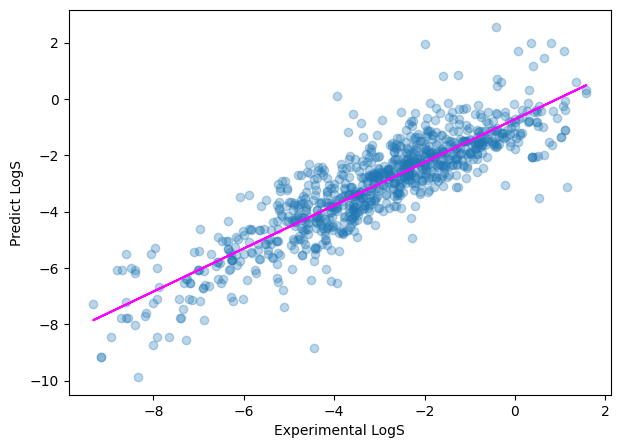

In [ ]:


plt.figure(figsize=(7, 5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), color='magenta')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')